# Code and Consciousness: An Analysis of the Adoption and Perception of AI Across Developer Demographics and Specializations
This project, titled “Code and Consciousness: An Analysis of the Adoption and Perception of AI Across Developer Demographics and Specializations,” aims to explore how various developer demographics have adopted and perceived artificial intelligence technologies.

Survey Data: [https://survey.stackoverflow.co/2023/#overview ](https://survey.stackoverflow.co/2023/#overview )

In [108]:
# Import data from data/survey_results_public.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

# Load data
df = pd.read_csv('data/survey_results_public.csv')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Not all of the data in the survey will be used in this analysis. Cleaning and preprocessing is required to ensure the data is in a usable format.

In [109]:
df_cleaned = df.copy()

# replace any instance of "â€™" with "'"
df_cleaned = df_cleaned.replace("â€™", "'")

# remove spaces in column names
df_cleaned.columns = df_cleaned.columns.str.replace(' ', '')

# remove columns with header name in the list
to_remove = [
    "ResponseId",
    "Q120",
    "CodingActivities",
    "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert",
    "YearsCodePro",
    "PurchaseInfluence", "TechList", "BuyNewTool",
    "Currency", "CompTotal",
    "LanguageWantToWorkWith",
    "DatabaseHaveWorkedWith", "DatabaseWantToWorkWith",
    "PlatformHaveWorkedWith", "PlatformWantToWorkWith",
    "WebframeHaveWorkedWith", "WebframeWantToWorkWith",
    "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith",
    "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith",
    "NEWCollabToolsWantToWorkWith",
    "OpSysPersonaluse",
    "OfficeStackAsyncHaveWorkedWith", "OfficeStackAsyncWantToWorkWith",
    "OfficeStackSyncHaveWorkedWith", "OfficeStackSyncWantToWorkWith",
    "AISearchHaveWorkedWith", "AISearchWantToWorkWith",
    "AIDevHaveWorkedWith", "AIDevWantToWorkWith",
    "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI",
    "AIAcc", 
    "AIToolInterestedinUsing", "AIToolCurrentlyUsing", "AIToolNotinterestedinUsing",
    "AINextVerydifferent", "AINextNeitherdifferentnorsimilar", "AINextSomewhatsimilar", "AINextVerysimilar", "AINextSomewhatdifferent",
    "TBranch", "ICorPM", "WorkExp",
    "Knowledge_1", "Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", "Knowledge_8",
    "Frequency_1", "Frequency_2", "Frequency_3",
    "TimeSearching", "TimeAnswering",
    "ProfessionalTech", "Industry",
    "SurveyLength", "SurveyEase"
]

df_dropped = df_cleaned.drop(columns=to_remove)

Relevant categorical variables are encoded using one-hot encoding.

In [110]:
# Add coded columns

# Make a copy of the dataframe
df_coded = df_dropped.copy()

# IsProfessionalDev is 1 if MainBranch is "I am a developer by profession" and 0 otherwise
df_coded['IsProfessionalDev'] = np.where(df_coded['MainBranch'] == "I am a developer by profession", 1, 0)

# IsWindowsUser if OpSysProfessionaluse includes "Windows" and 0 otherwise
df_coded['IsWindowsUser'] = np.where(df_coded['OpSysProfessionaluse'].str.contains("Windows", na=False), 1, 0)

# IsMacUser if OpSysProfessionaluse includes "MacOS" and 0 otherwise
df_coded['IsMacUser'] = np.where(df_coded['OpSysProfessionaluse'].str.contains("MacOS", na=False), 1, 0)

# IsPythonDev if LanguageHaveWorkedWith includes "Python" and 0 otherwise
df_coded['IsPythonDev'] = np.where(df_coded['LanguageHaveWorkedWith'].str.contains("Python", na=False), 1, 0)

# IsJavaScriptDev if LanguageHaveWorkedWith includes "JavaScript" or "TypeScript" and 0 otherwise
df_coded['IsJavaScriptDev'] = np.where(df_coded['LanguageHaveWorkedWith'].str.contains("JavaScript|TypeScript", na=False), 1, 0)

# IsVimUser if NEWCollabToolsHaveWorkedWith includes "Vim" and 0 otherwise
df_coded['IsVimUser'] = np.where(df_coded['NEWCollabToolsHaveWorkedWith'].str.contains("Vim", na=False), 1, 0)

# IsVSCodeUser if NEWCollabToolsHaveWorkedWith includes "Visual Studio Code" and 0 otherwise
df_coded['IsVSCodeUser'] = np.where(df_coded['NEWCollabToolsHaveWorkedWith'].str.contains("Visual Studio Code", na=False), 1, 0)

# IsEmployed if Employment contains "Employed" or "Independent contractor, freelancer, or self-employed" and 0 otherwise
df_coded['IsEmployed'] = np.where(df_coded['Employment'].str.contains("Employed|Independent", na=False), 1, 0)

# IsStudent if Employment contains "Student" and 0 otherwise
df_coded['IsStudent'] = np.where(df_coded['Employment'].str.contains("Student", na=False), 1, 0)

# IsEmployedOrStudent if Employment contains "Employed" or "Independent contractor, freelancer, or self-employed" or "Student" and 0 otherwise
df_coded['IsEmployedOrStudent'] = np.where(df_coded['Employment'].str.contains("Employed|Independent|Student", na=False), 1, 0)

# IsNotEmployedOrStudent if Employment contains "Not employed" or "Retired" and 0 otherwise
df_coded['IsNotEmployedOrStudent'] = np.where(df_coded['Employment'].str.contains("Not employed|Retired", na=False), 1, 0)

# IsRemote if RemoteWork is "Remote" or contains "Hybrid" and 0 otherwise
df_coded['IsRemote'] = np.where(df_coded['RemoteWork'].str.contains("Remote|Hybrid", na=False), 1, 0)

# IsInPerson if RemoteWork is "In-person" or contains "Hybrid" and 0 otherwise
df_coded['IsInPerson'] = np.where(df_coded['RemoteWork'].str.contains("In-person|Hybrid", na=False), 1, 0)

# HasGradDegree if EdLevel contains "Master's degree" or "Professional degree" and 0 otherwise
df_coded['HasGradDegree'] = np.where(df_coded['EdLevel'].str.contains("Master|Professional", na=False), 1, 0)

# HasUndergradDegree if EdLevel contains "Bachelor's degree" and 0 otherwise
df_coded['HasUndergradDegree'] = np.where(df_coded['EdLevel'].str.contains("Bachelor", na=False), 1, 0)

# HasSomeCollege if EdLevel contains "Some college/university study without earning a degree" or "Associate degree" and 0 otherwise
df_coded['HasSomeCollege'] = np.where(df_coded['EdLevel'].str.contains("Some college|Associate", na=False), 1, 0)

# HasHighSchool if EdLevel contains "Secondary school"and 0 otherwise
df_coded['HasHighSchool'] = np.where(df_coded['EdLevel'].str.contains("Secondary", na=False), 1, 0)

# HasLessThanHighSchool if EdLevel contains "Primary/elementary school" and 0 otherwise
df_coded['HasLessThanHighSchool'] = np.where(df_coded['EdLevel'].str.contains("Primary", na=False), 1, 0)

# IsUsingAI if AISelect is "Yes" and 0 otherwise
df_coded['IsUsingAI'] = np.where(df_coded['AISelect'] == "Yes", 1, 0)

# IsNotUsingAI if AISelect contains "No" and 0 otherwise
df_coded['IsNotUsingAI'] = np.where(df_coded['AISelect'].str.contains("No", na=False), 1, 0)

# # IsPlanningToUseAI if AISelect contains "plan to soon" and 0 otherwise
df_coded['IsPlanningToUseAI'] = np.where(df_coded['AISelect'].str.contains("plan to soon", na=False), 1, 0)

# # IsNotPlanningToUseAI if AISelect contains "don't plan to" and 0 otherwise
df_coded['IsNotPlanningToUseAI'] = np.where(df_coded['AISelect'].str.contains("don't plan to", na=False), 1, 0)

# Remove columns that were used to create the coded columns
df_coded = df_coded.drop(columns=['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'OpSysProfessionaluse', 'LanguageHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'AISelect'])

# Convert AISent column values from Likert scale (+ Unsure) to Interval
AISent_column = df_coded['AISent']
AISend_column = AISent_column.replace({
    "Very favorable": 5,
    "Favorable": 4,
    "Indifferent": 3,
    "Unfavorable": 2,
    "Very unfavorable": 1,
    "Unsure": 3
})
df_coded = df_coded.drop(columns=['AISent'])
df_coded['AISent'] = AISend_column

# Convert AIBen column values from Likert scale to Interval
AIBen_column = df_coded['AIBen']
AIBen_column = AIBen_column.replace({
    "Highly trust": 5,
    "Somewhat trust": 4,
    "Neither trust nor distrust": 3,
    "Somewhat distrust": 2,
    "Highly distrust": 1
})
df_coded = df_coded.drop(columns=['AIBen'])
df_coded['AIBen'] = AIBen_column

# If value of YearsCode is "Less than 1 year", set value to 0
df_coded['YearsCode'] = df_coded['YearsCode'].replace("Less than 1 year", 0)

# show the columns
print(df_coded.columns)

# Display the first 5 rows
# print(df_coded.head())

Index(['Age', 'YearsCode', 'DevType', 'OrgSize', 'Country',
       'ConvertedCompYearly', 'IsProfessionalDev', 'IsWindowsUser',
       'IsMacUser', 'IsPythonDev', 'IsJavaScriptDev', 'IsVimUser',
       'IsVSCodeUser', 'IsEmployed', 'IsStudent', 'IsEmployedOrStudent',
       'IsNotEmployedOrStudent', 'IsRemote', 'IsInPerson', 'HasGradDegree',
       'HasUndergradDegree', 'HasSomeCollege', 'HasHighSchool',
       'HasLessThanHighSchool', 'IsUsingAI', 'IsNotUsingAI',
       'IsPlanningToUseAI', 'IsNotPlanningToUseAI', 'AISent', 'AIBen'],
      dtype='object')


C:\Users\fourm\AppData\Local\Temp\ipykernel_16456\2357724951.py:77: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  AISend_column = AISent_column.replace({
C:\Users\fourm\AppData\Local\Temp\ipykernel_16456\2357724951.py:90: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  AIBen_column = AIBen_column.replace({


Explore outliers

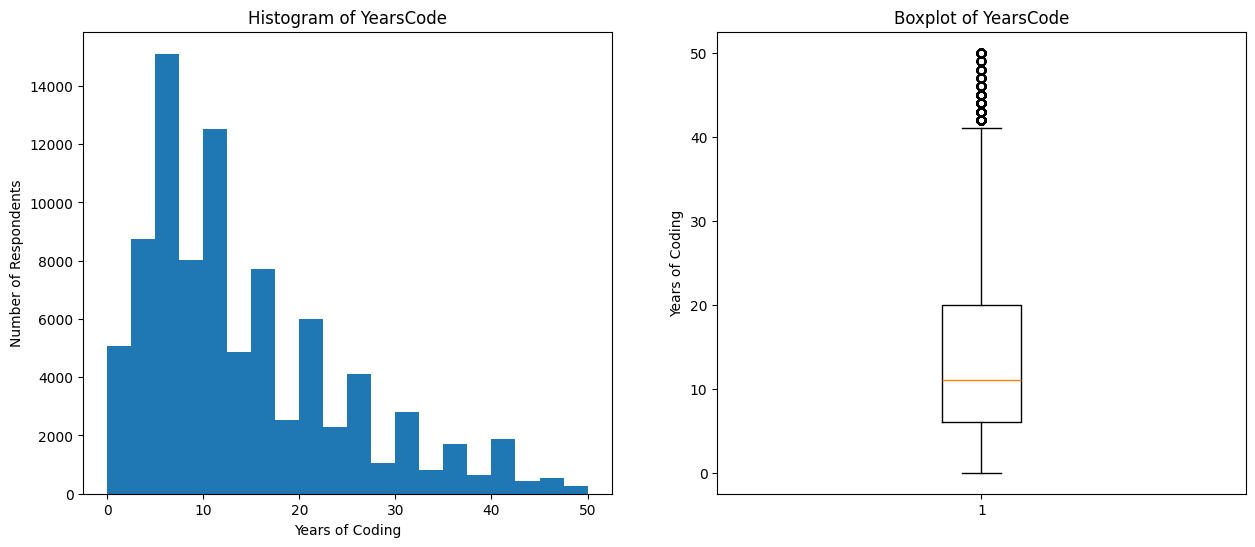

YearsCode Extreme Outliers (> 3xIQR): 24090
count    87082.000000
mean        13.816736
std         10.306998
min          0.000000
25%          6.000000
50%         11.000000
75%         20.000000
max         50.000000
Name: YearsCode, dtype: float64


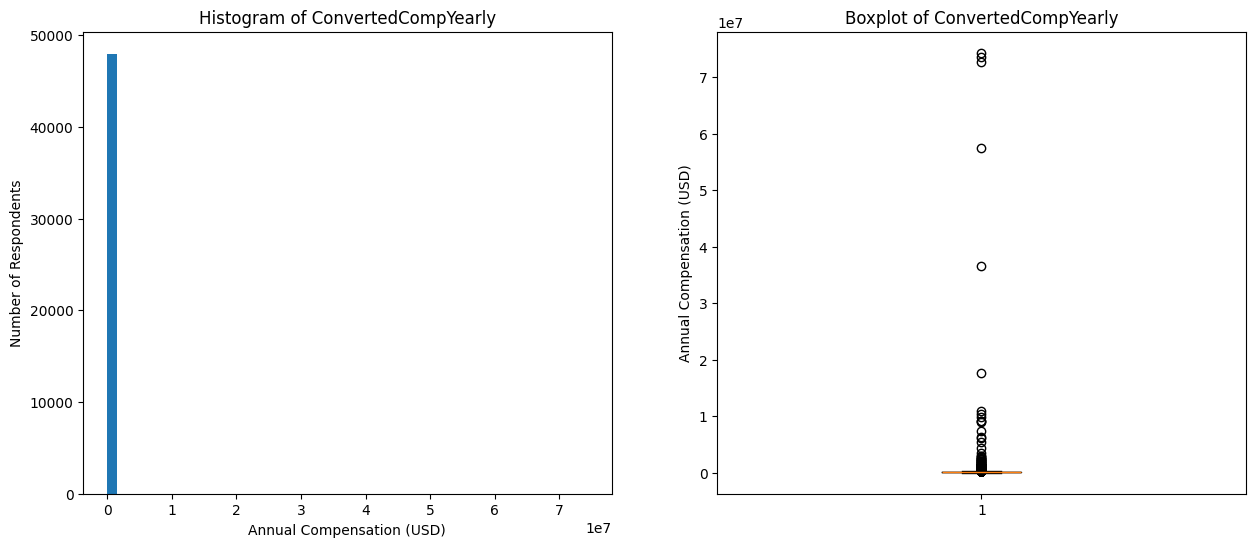

ConvertedCompYearly Extreme Outliers (> 3xIQR): 780
count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64


In [111]:
df_outlier = df_coded.copy()

# YearsCode column
# Convert YearsCode to numeric
df_outlier['YearsCode'] = pd.to_numeric(df_outlier['YearsCode'], errors='coerce')

# Histogram and boxplot of YearsCode column
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axs[0].hist(df_outlier['YearsCode'].dropna(), bins=20)
axs[0].set_title('Histogram of YearsCode')
axs[0].set_xlabel('Years of Coding')
axs[0].set_ylabel('Number of Respondents')

# Boxplot
axs[1].boxplot(df_outlier['YearsCode'].dropna())
axs[1].set_title('Boxplot of YearsCode')
axs[1].set_ylabel('Years of Coding')

plt.show()

# Calculate the z-scores of YearsCode
z_scores = (df_outlier['YearsCode'] - df_outlier['YearsCode'].mean()) / df_outlier['YearsCode'].std()

# Find the rows with z-scores greater than 3
outliers = df_outlier[z_scores.abs() > 3]

print(f'YearsCode Extreme Outliers (> 3xIQR): {outliers.size}')
print(df_outlier['YearsCode'].describe())


df_comp_outlier = df_outlier.copy()

# ConvertedCompYearly column
# Ignore but do not remove rows with ConvertedCompYearly values of NA
# Convert ConvertedCompYearly to numeric
na_outliers = df_comp_outlier['ConvertedCompYearly'].isna()

# Remove rows with ConvertedCompYearly values of NA
df_comp_outlier = df_comp_outlier.dropna(subset=['ConvertedCompYearly'])

# Histogram and boxplot of ConvertedCompYearly column
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axs[0].hist(df_comp_outlier['ConvertedCompYearly'], bins=50)
axs[0].set_title('Histogram of ConvertedCompYearly')
axs[0].set_xlabel('Annual Compensation (USD)')
axs[0].set_ylabel('Number of Respondents')

# Boxplot
axs[1].boxplot(df_comp_outlier['ConvertedCompYearly'])
axs[1].set_title('Boxplot of ConvertedCompYearly')
axs[1].set_ylabel('Annual Compensation (USD)')
plt.show()

# Calculate the z-scores of ConvertedCompYearly
z_scores = (df_comp_outlier['ConvertedCompYearly'] - df_comp_outlier['ConvertedCompYearly'].mean()) / df_comp_outlier['ConvertedCompYearly'].std()

# Find the rows with z-scores greater than 3
outliers = df_comp_outlier[z_scores.abs() > 3]

print(f'ConvertedCompYearly Extreme Outliers (> 3xIQR): {outliers.size}')
print(df_comp_outlier['ConvertedCompYearly'].describe())

In [112]:
# Export the cleaned data to a new CSV file (df_coded)
try:
    df_coded.to_csv('data/survey_results_public_cleaned.csv', index=False)
except PermissionError:
    print('Please close the file survey_results_public_cleaned.csv before running this script.')

Please close the file survey_results_public_cleaned.csv before running this script.


## H1: Younger developers have a more favorable opinion towards AI.

H0: There is no significant difference in opinion towards AI between younger and older developers.

H1: Younger developers have a more favorable opinion towards AI.

Younger Developers:
count    8827.000000
mean        4.060949
std         0.785895
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: AISent, dtype: float64

Older Developers:
count    38038.000000
mean         3.988827
std          0.797013
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: AISent, dtype: float64

T-Statistic: 7.747016117663473
P-Value: 1.008377256920349e-14
The results are statistically significant at the 0.05 level.
As a result, we can reject the null hypothesis.


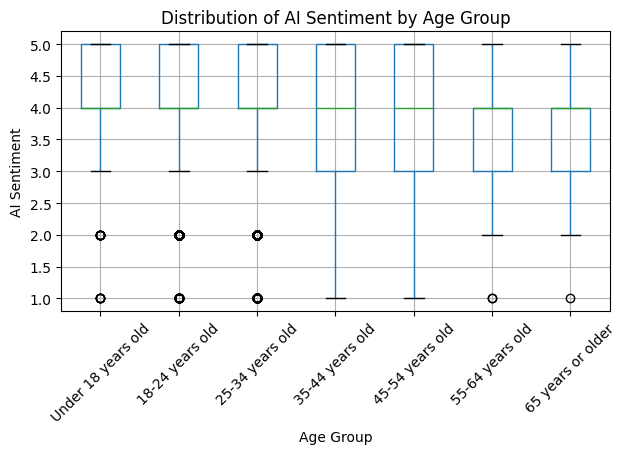

In [113]:
df_age_cleaned = df_coded.copy()

# remove rows where IsProfessionalDev is 0
df_age_cleaned = df_age_cleaned[df_age_cleaned['IsProfessionalDev'] == 1]

# remove rows where AISent is NA
df_age_cleaned = df_age_cleaned.dropna(subset=['AISent'])

# remove rows with 'Perfer not to say', 0, and NA values in the Age column
df_age_cleaned = df_age_cleaned[df_age_cleaned['Age'] != 'Prefer not to say']
df_age_cleaned = df_age_cleaned[df_age_cleaned['Age'] != '0']
df_age_cleaned = df_age_cleaned.dropna(subset=['Age'])\

# Divide developers into two groups based on age (younger is 'Under 18 years old' and '18-24 years old')
younger_developers = df_age_cleaned[df_age_cleaned['Age'] == 'Under 18 years old']
younger_developers = pd.concat([younger_developers, df_age_cleaned[df_age_cleaned['Age'] == '18-24 years old']])
older_developers = df_age_cleaned[(df_age_cleaned['Age'] != 'Under 18 years old') & (df_age_cleaned['Age'] != '18-24 years old')]

# Describe the data
print(f'Younger Developers:\n{younger_developers["AISent"].describe()}\n')
print(f'Older Developers:\n{older_developers["AISent"].describe()}\n')

# Perform t-test
t_statistic, p_value = stats.ttest_ind(younger_developers['AISent'], older_developers['AISent'], equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine if the results are statistically significant
if p_value < 0.05:
    print("The results are statistically significant at the 0.05 level.\nAs a result, we can reject the null hypothesis.")
else:
    print("The results are not statistically significant at the 0.05 level.\nAs a result, we can not reject the null hypothesis.")

# move 'Under 18 years old' to the beggining for the plot
df_age_cleaned['Age'] = pd.Categorical(df_age_cleaned['Age'])
temp_order = df_age_cleaned['Age'].cat.categories
new_order = [temp_order[-1]] + list(temp_order[:-1])
df_age_cleaned['Age'] = df_age_cleaned['Age'].cat.reorder_categories(new_order)

# Plot the distribution of AI sentiment for younger and older developers
fig, ax = plt.subplots()
df_age_cleaned.boxplot(column='AISent', by='Age', ax=ax)
plt.title('Distribution of AI Sentiment by Age Group')
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('AI Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## H2: Developers without higher education are more likely to trust AI.

H0: There is no significant difference in trust towards AI between developers with different education levels.

H1: Developers without higher education are more likely to trust AI.

Lower edu developers: 
count    3172.000000
mean        3.086381
std         0.976277
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: AIBen, dtype: float64

Higher edu developers: 
count    43126.000000
mean         3.086653
std          0.959700
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: AIBen, dtype: float64

T-Statistic: -0.015174729040569646
P-Value: 0.987893615101133
The results are not statistically significant at the 0.05 level.
As a result, we can not reject the null hypothesis.


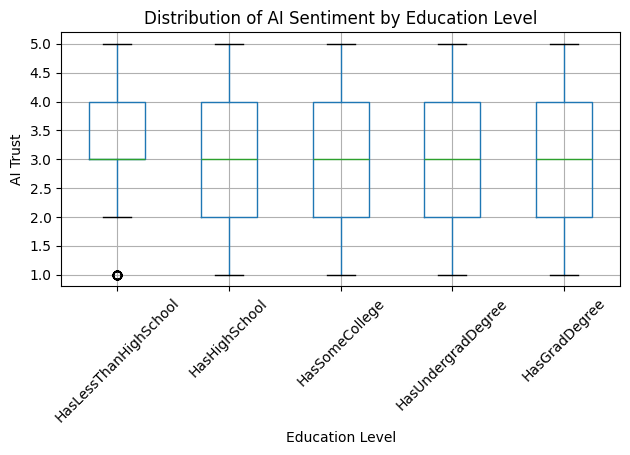

In [114]:
df_edu_cleaned = df_coded.copy()

# remove rows where IsProfessionalDev is 0
df_edu_cleaned = df_edu_cleaned[df_edu_cleaned['IsProfessionalDev'] == 1]

# remove rows where AIBen is NA
df_edu_cleaned = df_edu_cleaned.dropna(subset=['AIBen'])

# Column names: HasGradDegree	HasUndergradDegree	HasSomeCollege	HasHighSchool	HasLessThanHighSchool
# remove rows where all education columns are 0
df_edu_cleaned = df_edu_cleaned[(df_edu_cleaned['HasGradDegree'] == 1) | (df_edu_cleaned['HasUndergradDegree'] == 1) | (df_edu_cleaned['HasSomeCollege'] == 1) | (df_edu_cleaned['HasHighSchool'] == 1) | (df_edu_cleaned['HasLessThanHighSchool'] == 1)]

# Lower edu is 'HasLessThanHighSchool', 'HasHighSchool'
lower_edu_developers = df_edu_cleaned[(df_edu_cleaned['HasLessThanHighSchool'] == 1) | (df_edu_cleaned['HasHighSchool'] == 1)]
higher_edu_developers = df_edu_cleaned[(df_edu_cleaned['HasGradDegree'] == 1) | (df_edu_cleaned['HasUndergradDegree'] == 1) | (df_edu_cleaned['HasSomeCollege'] == 1)]

# Describe data
print(f'Lower edu developers: \n{lower_edu_developers["AIBen"].describe()}\n')
print(f'Higher edu developers: \n{higher_edu_developers["AIBen"].describe()}\n')

# Perform t-test
t_statistic, p_value = stats.ttest_ind(lower_edu_developers['AIBen'], higher_edu_developers['AIBen'], equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine if the results are statistically significant
if p_value < 0.05:
    print("The results are statistically significant at the 0.05 level.\nAs a result, we can reject the null hypothesis.")
else:
    print("The results are not statistically significant at the 0.05 level.\nAs a result, we can not reject the null hypothesis.")

# Plot the distribution of AI trust for lower and higher education developers
fig, ax = plt.subplots()
df_edu_cleaned['Education'] = df_edu_cleaned[['HasGradDegree', 'HasUndergradDegree', 'HasSomeCollege', 'HasHighSchool', 'HasLessThanHighSchool']].idxmax(axis=1)
# reorder the categories for the plot
df_edu_cleaned['Education'] = pd.Categorical(df_edu_cleaned['Education'])
temp_order = df_edu_cleaned['Education'].cat.categories
new_order = [temp_order[2], temp_order[1], temp_order[3], temp_order[4], temp_order[0]]
df_edu_cleaned['Education'] = df_edu_cleaned['Education'].cat.reorder_categories(new_order)

df_edu_cleaned.boxplot(column='AIBen', by='Education', ax=ax)
plt.title('Distribution of AI Sentiment by Education Level')
plt.suptitle('')
plt.xlabel('Education Level')
plt.ylabel('AI Trust')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## H3: AI users are most likely to be Python developers. 

H0: There is no significant difference in AI usage between developers who do and do not use Python.

H1: AI users are most likely to be Python developers. 

Python Developers:
count    30388.000000
mean         0.481703
std          0.499673
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: IsUsingAI, dtype: float64

Non-Python Developers:
count    36849.000000
mean         0.408668
std          0.491594
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: IsUsingAI, dtype: float64

Z-Statistic: 18.980106465607644
P-Value: 2.4909074299185846e-80
The results are statistically significant at the 0.05 level.
As a result, we can reject the null hypothesis.


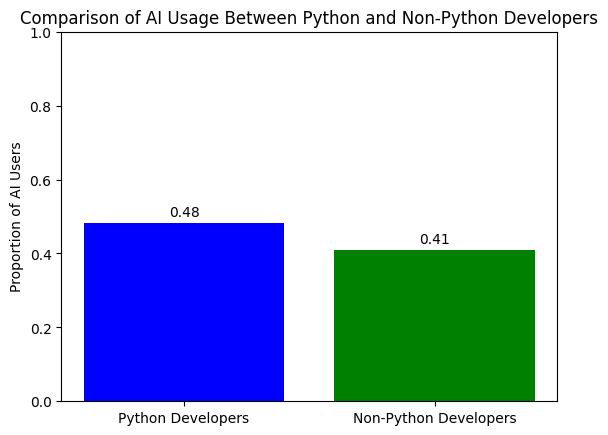

In [122]:
from statsmodels.stats.proportion import proportions_ztest

df_python_cleaned = df_coded.copy()

# remove rows where IsProfessionalDev is 0
df_python_cleaned = df_python_cleaned[df_python_cleaned['IsProfessionalDev'] == 1]

# remove rows where IsPythonDev is NA
df_python_cleaned = df_python_cleaned.dropna(subset=['IsPythonDev'])

# remove rows where IsUsingAI is NA
df_python_cleaned = df_python_cleaned.dropna(subset=['IsUsingAI'])

# Divide developers into two groups based on whether they use Python or not
python_developers = df_python_cleaned[df_python_cleaned['IsPythonDev'] == 1]
non_python_developers = df_python_cleaned[df_python_cleaned['IsPythonDev'] == 0]

# Describe the data
print(f'Python Developers:\n{python_developers["IsUsingAI"].describe()}\n')
print(f'Non-Python Developers:\n{non_python_developers["IsUsingAI"].describe()}\n')

# Count of AI users in both groups
count = np.array([python_developers['IsUsingAI'].sum(), non_python_developers['IsUsingAI'].sum()])

# Total number of developers in both groups
nobs = np.array([python_developers.shape[0], non_python_developers.shape[0]])

# Perform z-test
z_statistic, p_value = proportions_ztest(count, nobs)

# Print the results
print("Z-Statistic:", z_statistic)
print("P-Value:", p_value)

# Determine if the results are statistically significant
if p_value < 0.05:
    print("The results are statistically significant at the 0.05 level.\nAs a result, we can reject the null hypothesis.")
else:
    print("The results are not statistically significant at the 0.05 level.\nAs a result, we can not reject the null hypothesis.")

# Bar chart
prop_python = python_developers['IsUsingAI'].mean()
prop_non_python = non_python_developers['IsUsingAI'].mean()
labels = ['Python Developers', 'Non-Python Developers']
values = [prop_python, prop_non_python]
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green'])
ax.bar_label(bars, fmt='%.2f', padding=3)
ax.set_ylabel('Proportion of AI Users')
ax.set_title('Comparison of AI Usage Between Python and Non-Python Developers')
ax.set_ylim(0, 1)
plt.show()

## H4: Developers who use Visual Studio Code are more likely to use AI than users of Vim.

H0: There is no significant difference in AI usage between developers who use Visual Studio Code and Vim.

H1: Developers who use Visual Studio Code are more likely to use AI than users of Vim.

Vim Developers:
count    15018.000000
mean         0.420962
std          0.493730
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: IsUsingAI, dtype: float64

VS Code Developers:
count    49244.000000
mean         0.481602
std          0.499666
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: IsUsingAI, dtype: float64

Z-Statistic: -13.038280768970896
P-Value: 7.410934148814398e-39
The results are statistically significant at the 0.05 level.
As a result, we can reject the null hypothesis.


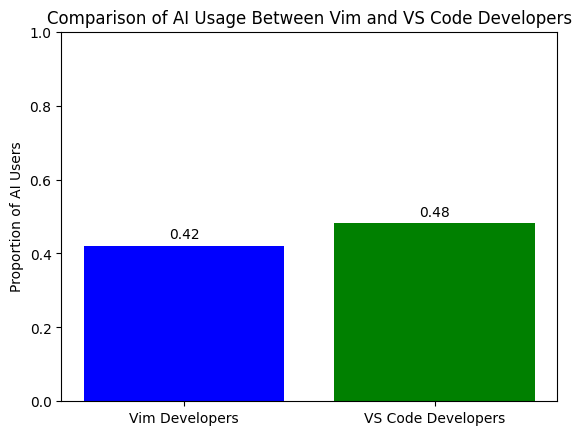

In [123]:
df_editor_cleaned = df_coded.copy()

# remove rows where IsProfessionalDev is 0
df_editor_cleaned = df_editor_cleaned[df_editor_cleaned['IsProfessionalDev'] == 1]

# remove rows where IsVimUser is NA
df_editor_cleaned = df_editor_cleaned.dropna(subset=['IsVimUser'])

# remove rows where IsVSCodeUser is NA
df_editor_cleaned = df_editor_cleaned.dropna(subset=['IsVSCodeUser'])

# remove rows where both IsVimUser and IsVSCodeUser are 0
df_editor_cleaned = df_editor_cleaned[(df_editor_cleaned['IsVimUser'] == 1) | (df_editor_cleaned['IsVSCodeUser'] == 1)]

# remove rows where IsUsingAI is NA
df_editor_cleaned = df_editor_cleaned.dropna(subset=['IsUsingAI'])

# Divide developers into two groups based on whether they use Vim or VSCode
vim_developers = df_editor_cleaned[df_editor_cleaned['IsVimUser'] == 1]
vs_code_developers = df_editor_cleaned[df_editor_cleaned['IsVSCodeUser'] == 1]

# Describe the data
print(f'Vim Developers:\n{vim_developers["IsUsingAI"].describe()}\n')
print(f'VS Code Developers:\n{vs_code_developers["IsUsingAI"].describe()}\n')

# Count of AI users in both groups
count = np.array([vim_developers['IsUsingAI'].sum(), vs_code_developers['IsUsingAI'].sum()])

# Total number of developers in both groups
nobs = np.array([vim_developers.shape[0], vs_code_developers.shape[0]])

# Perform z-test
z_statistic, p_value = proportions_ztest(count, nobs)

# Print the results
print("Z-Statistic:", z_statistic)
print("P-Value:", p_value)

# Determine if the results are statistically significant
if p_value < 0.05:
    print("The results are statistically significant at the 0.05 level.\nAs a result, we can reject the null hypothesis.")
else:
    print("The results are not statistically significant at the 0.05 level.\nAs a result, we can not reject the null hypothesis.")

# Bar chart
prop_vim = vim_developers['IsUsingAI'].mean()
prop_vs_code = vs_code_developers['IsUsingAI'].mean()
labels = ['Vim Developers', 'VS Code Developers']
values = [prop_vim, prop_vs_code]
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green'])
ax.bar_label(bars, fmt='%.2f', padding=3)
ax.set_ylabel('Proportion of AI Users')
ax.set_title('Comparison of AI Usage Between Vim and VS Code Developers')
ax.set_ylim(0, 1)
plt.show()

## H5: Remote workers are more likely to use AI.

H0: There is no significant difference in AI usage between remote workers and non-remote workers.

H1: Remote workers are more likely to use AI.

In-Person Developers:
count    43244.000000
mean         0.417515
std          0.493155
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: IsUsingAI, dtype: float64

Remote Developers:
count    61697.00000
mean         0.43584
std          0.49587
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: IsUsingAI, dtype: float64

Z-Statistic: -5.904893298149552
P-Value: 3.5287506632987085e-09
The results are statistically significant at the 0.05 level.
As a result, we can reject the null hypothesis.


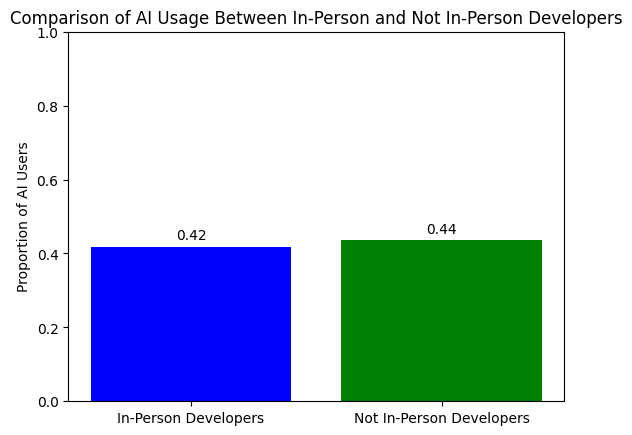

In [140]:
df_remote_cleaned = df_coded.copy()

# remove rows where IsEmployedOrStudent is 0
df_remote_cleaned = df_remote_cleaned[df_remote_cleaned['IsEmployedOrStudent'] == 1]

# remove rows where IsRemote is NA
df_remote_cleaned = df_remote_cleaned.dropna(subset=['IsRemote'])

# remove rows where IsInPerson is NA
df_remote_cleaned = df_remote_cleaned.dropna(subset=['IsInPerson'])

# remove rows where IsUsingAI is NA
df_remote_cleaned = df_remote_cleaned.dropna(subset=['IsUsingAI'])

# Divide developers into two groups based on whether they work in person or remotely
in_person_developers = df_remote_cleaned[df_remote_cleaned['IsInPerson'] == 1]
remote_developers = df_remote_cleaned[df_remote_cleaned['IsRemote'] == 1]

# Describe the data
print(f'In-Person Developers:\n{in_person_developers["IsUsingAI"].describe()}\n')
print(f'Remote Developers:\n{remote_developers["IsUsingAI"].describe()}\n')

# Count of AI users in both groups
count = np.array([in_person_developers['IsUsingAI'].sum(), remote_developers['IsUsingAI'].sum()])
# Total number of developers in both groups
nobs = np.array([in_person_developers.shape[0], remote_developers.shape[0]])

# Perform z-test
z_statistic, p_value = proportions_ztest(count, nobs)

# Print the results
print("Z-Statistic:", z_statistic)
print("P-Value:", p_value)

# Determine if the results are statistically significant
if p_value < 0.05:
    print("The results are statistically significant at the 0.05 level.\nAs a result, we can reject the null hypothesis.")
else:
    print("The results are not statistically significant at the 0.05 level.\nAs a result, we can not reject the null hypothesis.")

# Bar chart
prop_in_person = in_person_developers['IsUsingAI'].mean()
prop_remote = remote_developers['IsUsingAI'].mean()
labels = ['In-Person Developers', 'Not In-Person Developers']
values = [prop_in_person, prop_remote]
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green'])
ax.bar_label(bars, fmt='%.2f', padding=3)
ax.set_ylabel('Proportion of AI Users')
ax.set_title('Comparison of AI Usage Between In-Person and Not In-Person Developers')
ax.set_ylim(0, 1)
plt.show()

## H6: The level of AI adoption correlates positively with perceived AI benefits.

H0: There is no significant correlation between the level of AI adoption and perceived AI benefits.

H1: The level of AI adoption correlates positively with perceived AI benefits.

## H7: There is a significant difference in the level of AI adoption between developers in developing countries and those in developed countries.

H0: There is no significant difference in the level of AI adoption between developers in developing countries and those in developed countries.

H1: There is a significant difference in the level of AI adoption between developers in developing countries and those in developed countries.

## H8: Developer compensation can be predicted based on demographics and attitudes towards AI.

H0: There is no significant relationship between developer compensation and demographics and attitudes towards AI.

H1: Developer compensation can be predicted based on demographics and attitudes towards AI.